In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
pitch_df = pd.read_csv("k_prob.csv")
pitch_df.head()

,game_pk,game_date,at_bat_number,pitch_number,pitch_type,pitcher_name,pitcher,batter,catcher,description,zone,stand,p_throws,balls,strikes,plate_x,plate_z,sz_top,sz_bot,broadcast
0,662588,4/9/22,51,6,CH,"Bassitt, Chris",605135,605137,543510,called_strike,8.0,L,R,2,2,0.17,2.20,3.74,1.82,https://sporty-clips.mlb.com/1034420a-0db5-43b...
1,662588,4/9/22,51,5,FC,"Bassitt, Chris",605135,605137,543510,ball,11.0,L,R,1,2,-0.92,5.43,3.75,1.83,https://sporty-clips.mlb.com/3c758e31-1f42-4ed...
2,662588,4/9/22,51,1,SL,"Bassitt, Chris",605135,605137,543510,ball,14.0,L,R,0,0,0.86,1.28,3.51,1.58,https://sporty-clips.mlb.com/743d7d90-c6e5-40e...
3,662123,4/9/22,33,5,FF,"Rodón, Carlos",607074,643265,663698,ball,11.0,R,L,1,2,-0.15,5.07,3.58,1.85,https://sporty-clips.mlb.com/042a29c4-504c-49c...
4,663205,4/9/22,37,7,SL,"Woodruff, Brandon",605540,664023,605170,ball,14.0,L,R,2,2,1.46,2.40,3.40,1.60,https://sporty-clips.mlb.com/221061be-181c-43b...


In [3]:
def view_video(data_url):
    """ view_video returns an HTML object to play
    a video

    @param file_name (str): File path to .mp4 file

    Returns:

        - html (HTML object): HTML object to view video
    """

    html = HTML("""
                <video width=700 controls>
                      <source src="%s" type="video/mp4">
                </video>
                """ % data_url)
    return html

In [4]:
example_pitch = pitch_df.iloc[0]
view_video(example_pitch["broadcast"])

In [5]:
example_pitch

game_pk                                                     662588
game_date                                                   4/9/22
at_bat_number                                                   51
pitch_number                                                     6
pitch_type                                                      CH
pitcher_name                                        Bassitt, Chris
pitcher                                                     605135
batter                                                      605137
catcher                                                     543510
description                                          called_strike
zone                                                             8
stand                                                            L
p_throws                                                         R
balls                                                            2
strikes                                                       

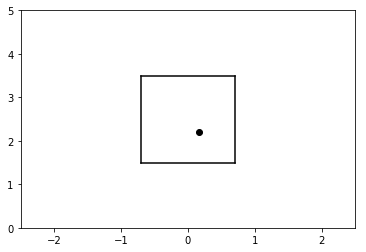

In [6]:
# Initialize figure
fig = plt.figure()
axis = fig.add_subplot(111)

# Establish boundaries
width = 17 / 12 # width of home plate
left = -width/2
right = width/2
bottom = 1.5 # feet
top = 3.5

# Drawing the strike boundaries
axis.plot([left, right], [bottom, bottom], color = 'k')  # Lower boundary
axis.plot([left, right], [top, top], color = 'k')  # Upper boundary
axis.plot([right, right], [bottom, top], color = 'k')  # Right boundary
axis.plot([left, left], [bottom, top], color = 'k')  # Left boundary

axis.plot(example_pitch["plate_x"], example_pitch["plate_z"], marker='o', color='k')

axis.set_xlim(-2.5, 2.5)
axis.set_ylim(0, 5)

plt.show()

In [7]:
def view_pitch(pitch):
    # Initialize figure
    fig = plt.figure()
    axis = fig.add_subplot(111)

    # Establish boundaries
    width = 17 / 12 # width of home plate
    left = -width/2
    right = width/2
    bottom = pitch["sz_bot"] # feet
    top = pitch["sz_top"]
    height = top - bottom

    # Strikezone boundary
    axis.plot([left, right], [bottom, bottom], color = 'k')  # Lower boundary
    axis.plot([left, right], [top, top], color = 'k')  # Upper boundary
    axis.plot([right, right], [bottom, top], color = 'k')  # Right boundary
    axis.plot([left, left], [bottom, top], color = 'k')  # Left boundary
    
    # Inner boxes
    horizontal_locs = [left + width/3, left + 2*width/3]
    vertical_locs = [bottom + height/3, bottom + 2*height/3]
    
    for horiz_loc in horizontal_locs:
        axis.plot([horiz_loc, horiz_loc], [bottom, top], color = 'k')
    
    for vert_loc in vertical_locs:
        axis.plot([left, right], [vert_loc, vert_loc], color = 'k')

    # Plot pitch
    axis.plot(pitch["plate_x"], pitch["plate_z"], marker='o', color='k')
    
    # Draw plate
    axis.plot([0, width/2], [0, 0.25], color = 'k')
    axis.plot([0, -width/2], [0, 0.25], color = 'k')
    axis.plot([width/2, width/2], [0.25, 0.5], color = 'k')
    axis.plot([-width/2, -width/2], [0.25, 0.5], color = 'k')
    axis.plot([-width/2, width/2], [0.5, 0.5], color = 'k')

    # Set axes limits
    axis.set_xlim(-3, 3)
    axis.set_ylim(0, 6)
    
    # Remove axis tick labels
    axis.set_yticklabels([])
    axis.set_xticklabels([])

    
    plt.show()
    
    video = view_video(pitch["broadcast"])
    return video

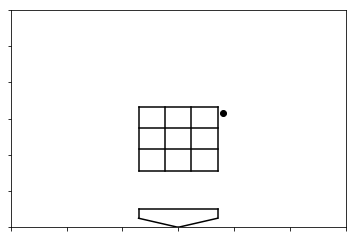

In [8]:
index = 10
video = view_pitch(pitch_df.iloc[index])
video